In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

In [170]:
df = pd.read_csv('C:/Bank_Personal_Loan_Modelling_classification.csv', encoding='latin-1')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1.0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1.0,0,0
2,3,39,15,11,94720,1,1,1,0,0,0.0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0.0,0,0
4,5,35,8,45,91330,4,1,2,0,0,0.0,0,1


In [171]:
df.shape

(5000, 13)

In [172]:
df.drop(['ID','ZIP Code'],axis=1,inplace=True)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1.0,0,0
1,45,19,34,3,1.5,1,0,0,1.0,0,0
2,39,15,11,1,1,1,0,0,0.0,0,0
3,35,9,100,1,2.7,2,0,0,0.0,0,0
4,35,8,45,4,1,2,0,0,0.0,0,1


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   object 
 1   Experience          5000 non-null   object 
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               4998 non-null   object 
 5   Education           5000 non-null   int64  
 6   Mortgage            4999 non-null   object 
 7   Personal Loan       5000 non-null   object 
 8   Securities Account  4997 non-null   float64
 9   Online              5000 non-null   object 
 10  CreditCard          4998 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 429.8+ KB


In [174]:
df = df[df['CCAvg'].apply(lambda x: str(x).isdigit())]
df['CCAvg'] = df['CCAvg'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 2 to 4994
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 685 non-null    object 
 1   Experience          685 non-null    object 
 2   Income              685 non-null    int64  
 3   Family              685 non-null    int64  
 4   CCAvg               685 non-null    float64
 5   Education           685 non-null    int64  
 6   Mortgage            685 non-null    object 
 7   Personal Loan       685 non-null    object 
 8   Securities Account  684 non-null    float64
 9   Online              685 non-null    object 
 10  CreditCard          684 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 64.2+ KB


In [175]:
#we will convert the CCAvg from monthely average to annual average like income coulmn
df['ann_CV'] = df['CCAvg'] * 12
df.drop('CCAvg', axis = 1, inplace = True)
df.head()

,Age,Experience,Income,Family,Education,Mortgage,Personal Loan,Securities Account,Online,CreditCard,ann_CV
2,39,15,11,1,1,0,0,0.0,0,0,12.0
4,35,8,45,4,2,0,0,0.0,0,1,12.0
14,67,41,112,1,1,0,0,1.0,0,0,24.0
21,57,27,63,3,3,0,0,0.0,1,0,24.0
31,40,16,29,1,2,0,0,0.0,1,0,24.0


In [176]:
for i in df.columns:
    if df[i].dtype == 'object':
        df = df[df[i].apply(lambda x: str(x).isdigit())]
        df[i] = df[i].astype(int)
df.info()
        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673 entries, 2 to 4994
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 673 non-null    int32  
 1   Experience          673 non-null    int32  
 2   Income              673 non-null    int64  
 3   Family              673 non-null    int64  
 4   Education           673 non-null    int64  
 5   Mortgage            673 non-null    int32  
 6   Personal Loan       673 non-null    int32  
 7   Securities Account  672 non-null    float64
 8   Online              673 non-null    int32  
 9   CreditCard          673 non-null    int32  
 10  ann_CV              673 non-null    float64
dtypes: float64(2), int32(6), int64(3)
memory usage: 47.3 KB


In [177]:
df.describe()

,Age,Experience,Income,Family,Education,Mortgage,Personal Loan,Securities Account,Online,CreditCard,ann_CV
count,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,672.000000,673.000000,673.000000,673.000000
mean,43.835067,18.282318,75.945022,2.362556,1.872214,55.809807,0.092125,0.113095,0.610698,0.291233,24.320951
std,11.105735,11.050234,48.573903,1.109709,0.831853,105.442038,0.289417,0.316945,0.487955,0.454669,23.041199
min,24.000000,0.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,9.000000,38.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
50%,42.000000,17.000000,65.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,24.000000
75%,53.000000,27.000000,108.000000,3.000000,3.000000,95.000000,0.000000,0.000000,1.000000,1.000000,24.000000
max,67.000000,42.000000,203.000000,4.000000,3.000000,617.000000,1.000000,1.000000,1.000000,1.000000,120.000000


In [178]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    1
Online                0
CreditCard            0
ann_CV                0
dtype: int64

In [179]:
df['Securities Account'] = df['Securities Account'].fillna(df['Securities Account'].mean())
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
Online                0
CreditCard            0
ann_CV                0
dtype: int64

<AxesSubplot: >

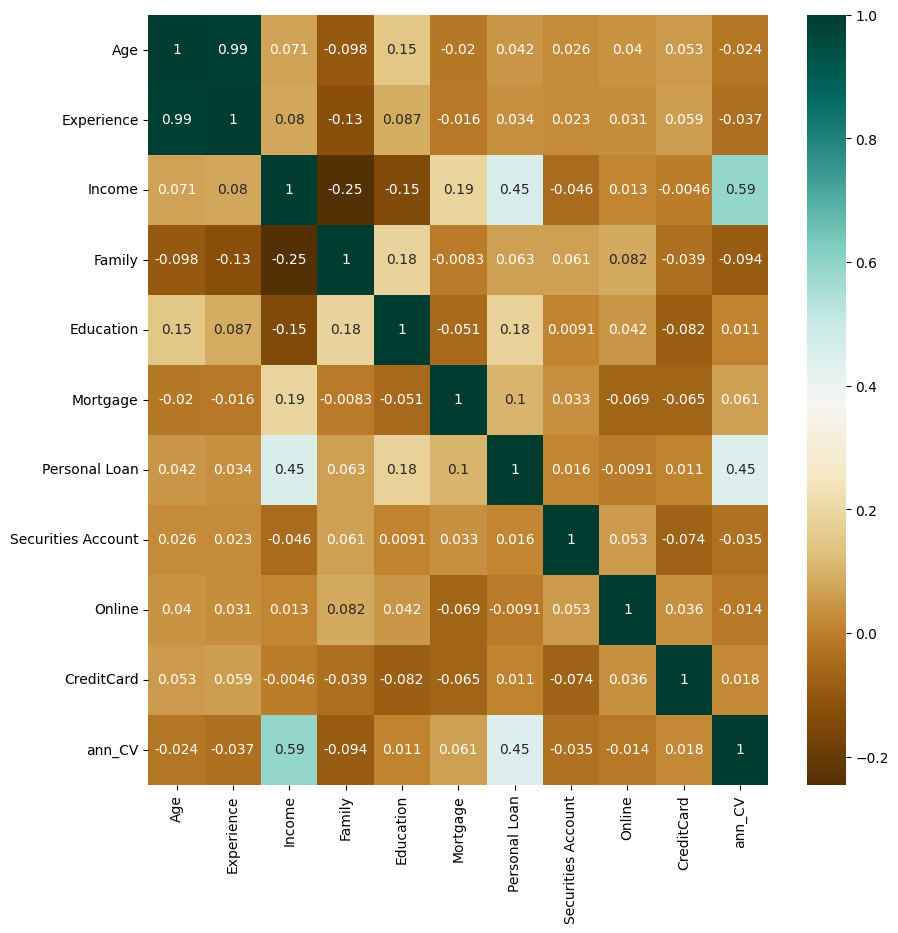

In [181]:
%matplotlib inline
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True , cmap='BrBG' )

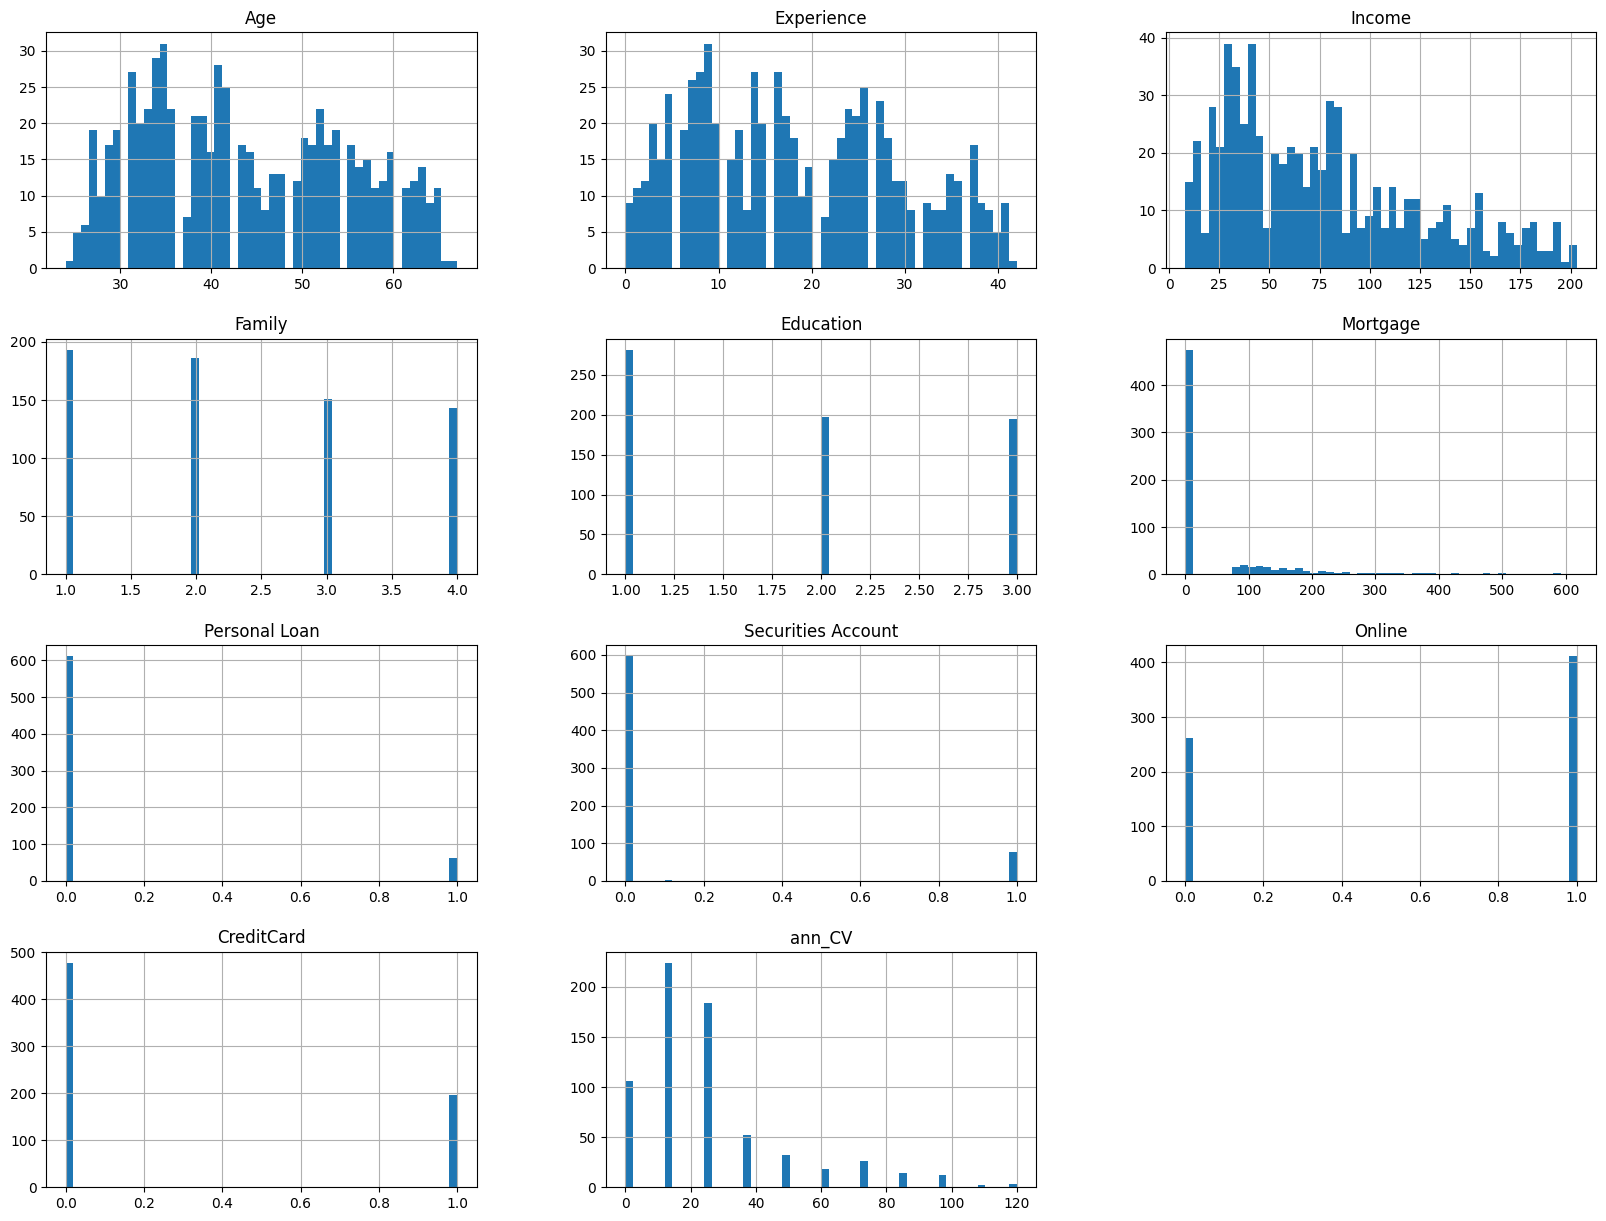

In [204]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

<AxesSubplot: xlabel='Age', ylabel='Income'>

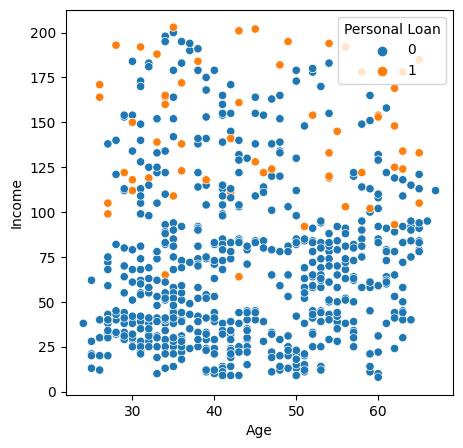

In [182]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x = 'Age', y = 'Income', data = df, hue = 'Personal Loan')

<AxesSubplot: xlabel='Age', ylabel='ann_CV'>

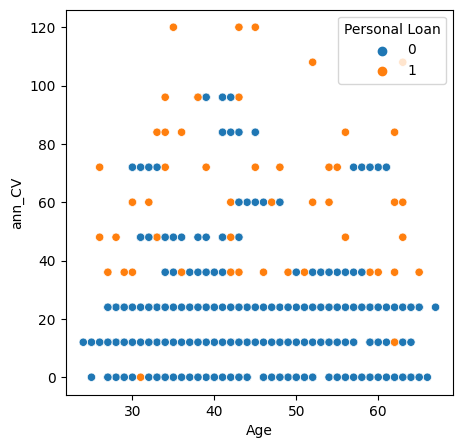

In [183]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x = 'Age', y = 'ann_CV', data = df, hue = 'Personal Loan')

<AxesSubplot: xlabel='Experience', ylabel='count'>

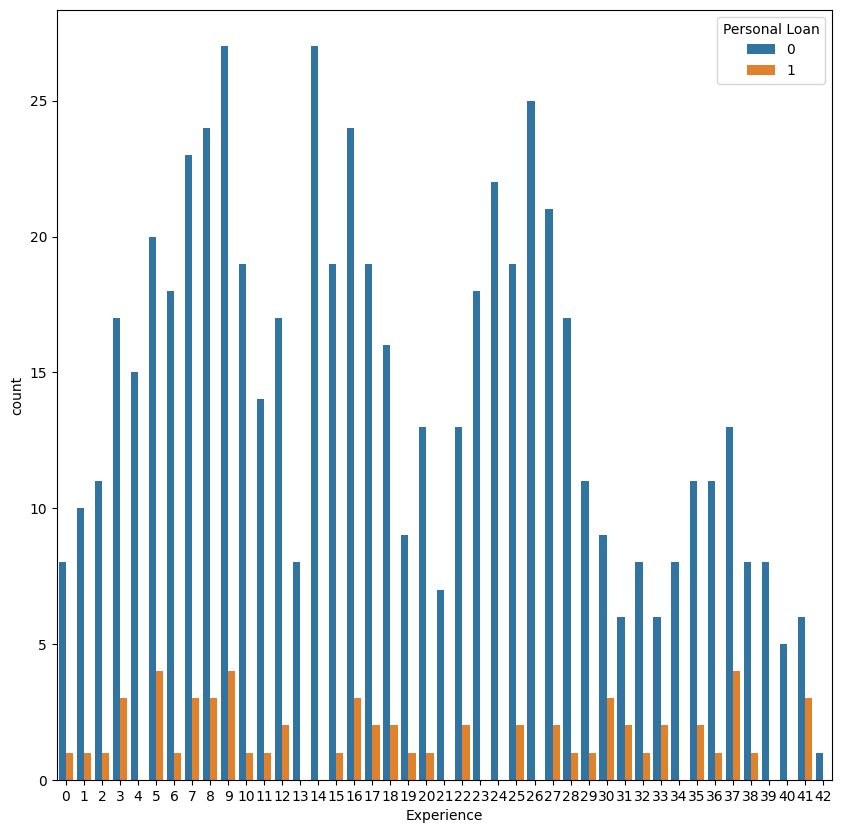

In [188]:
plt.figure(figsize=(10, 10))
sns.countplot(x='Experience', hue = 'Personal Loan', data = df)

<AxesSubplot: xlabel='Family', ylabel='count'>

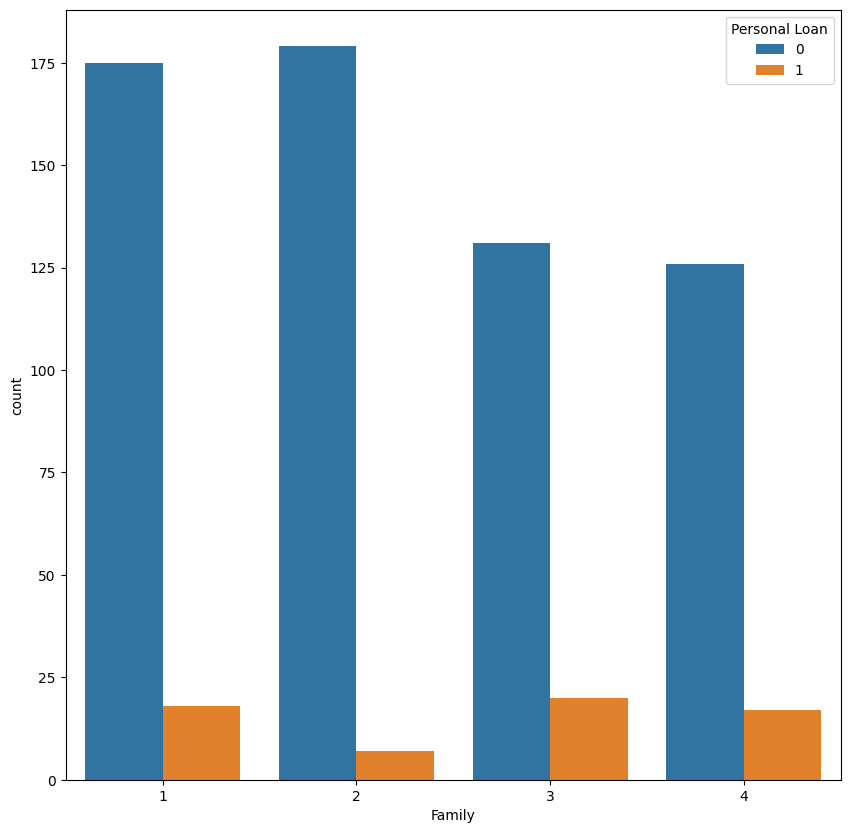

In [189]:
plt.figure(figsize=(10, 10))
sns.countplot(x='Family', hue = 'Personal Loan', data = df)

<AxesSubplot: xlabel='CreditCard', ylabel='count'>

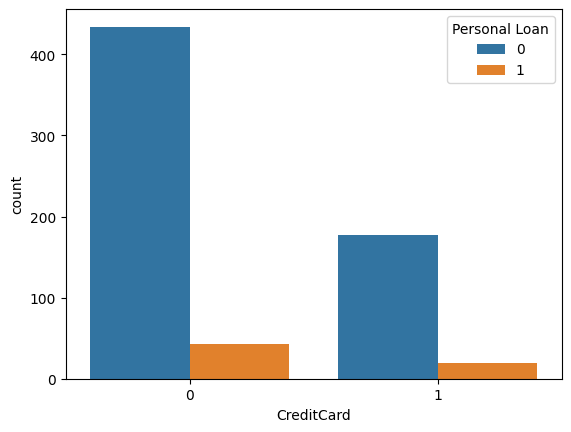

In [190]:
sns.countplot(x='CreditCard', hue = 'Personal Loan', data = df)

<AxesSubplot: xlabel='Securities Account', ylabel='count'>

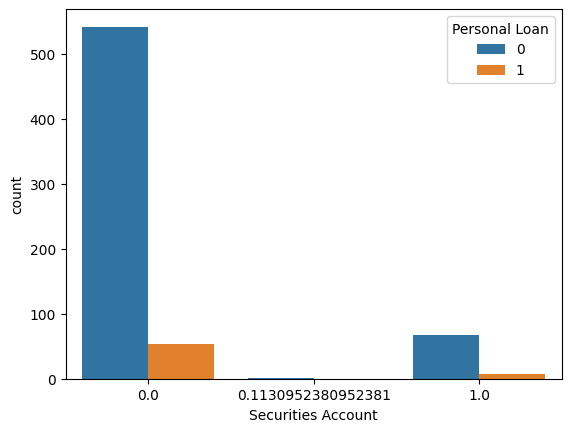

In [191]:
sns.countplot(x='Securities Account', hue = 'Personal Loan', data = df)

<AxesSubplot: xlabel='Education', ylabel='count'>

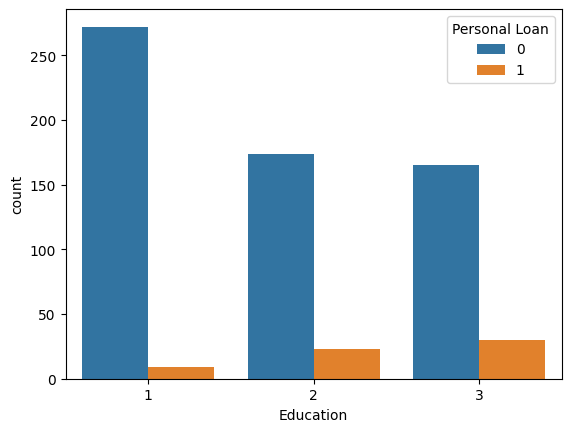

In [193]:
sns.countplot(x='Education', hue = 'Personal Loan', data = df)

In [212]:
km = KMeans (n_clusters=2,random_state=42,init='random')
m = df.drop('Personal Loan', axis = 1)
km.fit(m)
cluster_kmeans=km.predict(m)

c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [213]:
#prediction and accurcy
from sklearn import metrics
x = metrics.silhouette_score(m,cluster_kmeans)
x

0.5938692864862908

c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

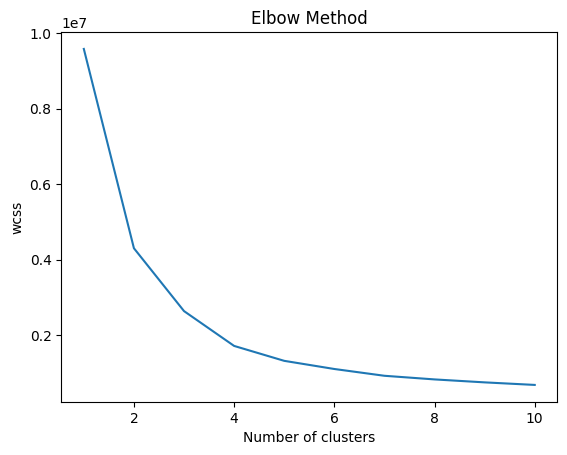

In [210]:
wcss = []
for i in range(1,11):
   kmeans=KMeans(n_clusters=i,random_state=42)
   kmeans.fit(m)
   wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [214]:
from sklearn.cluster import DBSCAN
# Create DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(m)
y_dbscan = dbscan.fit_predict(m)

In [215]:
prediction = metrics.silhouette_score(m,cluster_kmeans)
prediction

0.5938692864862908